In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import TimeSeriesSplit
from sklearn.utils.class_weight import compute_class_weight



In [186]:
# Load the data
df=pd.read_excel(r'C:\Users\hp\Desktop\M2\PFE\data\Well control data set\KICK While DrillingCoring\Well-6\Excel Data\Well-6_01-07-2022.xlsx')
df.shape

(17280, 42)

In [187]:
# Select input features (X) and target variable (y)
X = df[['TVA (m3)', 'SPPA (kPa)', 'MFOP ((m3/s)/(m3/s))', 'GASA (mol/mol)']].values
y = df['STATUS'].values

In [188]:
# Normalize the input features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [189]:
# Define time steps and target horizon
time_steps =36  # Number of time steps to consider (5 seconds * 36 = 3 minutes)

# Generate input sequences and corresponding targets
X_sequences = []
y_targets = []
for i in range(len(X_scaled) - time_steps  + 1):
    X_sequences.append(X_scaled[i:i+time_steps])
    y_targets.append(y[i:i+time_steps])

In [190]:
print(len(X_sequences[0]))
print(len(y_targets[0]))

36
36


In [191]:
X_sequences = np.array(X_sequences)
y_targets = np.array(y_targets)

In [192]:

# Initialize time series cross-validator
tscv = TimeSeriesSplit(n_splits=10)  # Define the number of splits

# Initialize lists to store evaluation metrics
confusion_matrices = []
precisions = []
recalls = []
f1_scores = []
accuracies = []

# Iterate through each split
for train_index, test_index in tscv.split(X_sequences):
    # Split the data into training and testing sets
    X_train, X_test = X_sequences[train_index], X_sequences[test_index]
    y_train, y_test = y_targets[train_index], y_targets[test_index]

    
    # Calculate class weights
    class_weights = compute_class_weight(
        class_weight='balanced',
        classes= np.unique(y),
        y=y_train)

    # Build the LSTM model
    model = Sequential()
    model.add(LSTM(units=64, input_shape=(time_steps, X.shape[1])))
    model.add(Dense(units="", activation='sigmoid'))

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model with class weights
    model.fit(X_train, y_train, epochs=10, batch_size=32, class_weight=class_weights)

 

    # Make predictions
    y_pred_proba = model.predict(X_test)
    y_pred = np.round(y_pred_proba)

    # Compute evaluation metrics
    cm = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    # Append the metrics to the respective lists
    confusion_matrices.append(cm)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    accuracies.append(accuracy)




TypeError: unhashable type: 'numpy.ndarray'

In [ ]:
# Print the evaluation metrics for each split
for i in range(len(confusion_matrices)):
    print('Split', i+1)
    print('Confusion Matrix:\n', confusion_matrices[i])
    print('Precision:', precisions[i])
    print('Recall:', recalls[i])
    print('F1-Score:', f1_scores[i])
    print('Accuracy:', accuracies[i])
    print('-----------------------')


Split 1
Confusion Matrix:
 [[1567]]
Precision: 0.0
Recall: 0.0
F1-Score: 0.0
Accuracy: 1.0
-----------------------
Split 2
Confusion Matrix:
 [[1567]]
Precision: 0.0
Recall: 0.0
F1-Score: 0.0
Accuracy: 1.0
-----------------------
Split 3
Confusion Matrix:
 [[1567]]
Precision: 0.0
Recall: 0.0
F1-Score: 0.0
Accuracy: 1.0
-----------------------
Split 4
Confusion Matrix:
 [[1567]]
Precision: 0.0
Recall: 0.0
F1-Score: 0.0
Accuracy: 1.0
-----------------------
Split 5
Confusion Matrix:
 [[1567]]
Precision: 0.0
Recall: 0.0
F1-Score: 0.0
Accuracy: 1.0
-----------------------
Split 6
Confusion Matrix:
 [[1567]]
Precision: 0.0
Recall: 0.0
F1-Score: 0.0
Accuracy: 1.0
-----------------------
Split 7
Confusion Matrix:
 [[1567]]
Precision: 0.0
Recall: 0.0
F1-Score: 0.0
Accuracy: 1.0
-----------------------
Split 8
Confusion Matrix:
 [[1567]]
Precision: 0.0
Recall: 0.0
F1-Score: 0.0
Accuracy: 1.0
-----------------------
Split 9
Confusion Matrix:
 [[1458    0]
 [ 109    0]]
Precision: 0.0
Recall: 0.0

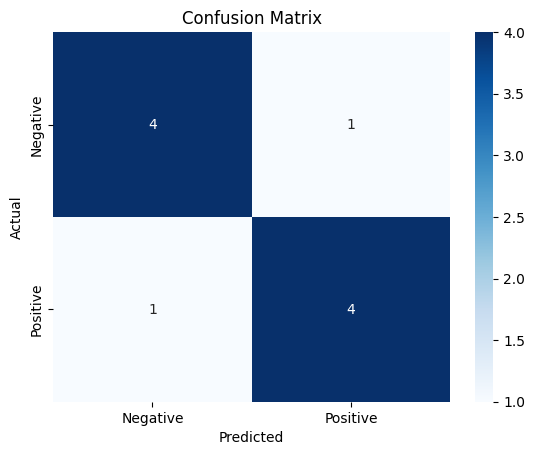

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate example predictions and actual labels
y_true = np.array([1, 0, 1, 1, 0, 0, 1, 0, 0, 1])
y_pred = np.array([1, 0, 0, 1, 0, 1, 1, 0, 0, 1])

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Define labels for the confusion matrix
labels = ['Negative', 'Positive']

# Plot confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels)

# Add labels, title, and axis ticks
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.xticks(ticks=[0.5, 1.5], labels=labels)
plt.yticks(ticks=[0.5, 1.5], labels=labels)

# Show the plot
plt.show()

In [ ]:
df=pd.read_excel(r'C:\Users\hp\Desktop\M2\PFE\Code\code pfe\Coud source\Code\data\Well-6_01-07-2022.xlsx')
df.shape

(17280, 8)

In [ ]:
df = df[['index','TVA (m3)', 'SPPA (kPa)', 'MFOP ((m3/s)/(m3/s))', 'GASA (mol/mol)','STATUS']]
df.shape

(17280, 6)

In [ ]:
model=Sequential()
model.add(LSTM(128,activation='tanh',return_sequences=True,input_shape=(1,X.shape[1])))
model.add(LSTM(49,activation='tanh'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy', metrics=['accuracy','precision','recall','f1_score'])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 1, 128)            68096     
                                                                 
 lstm_9 (LSTM)               (None, 49)                34888     
                                                                 
 dense_4 (Dense)             (None, 1)                 50        
                                                                 
Total params: 103,034
Trainable params: 103,034
Non-trainable params: 0
_________________________________________________________________


In [ ]:
df['index'][df.shape[0]-1]

'07/01/2022, 23:59:56'

In [ ]:
grouped=df.groupby('index')

In [ ]:
for grop in grouped:
    df_batch=pd.DataFrame(columns=['id','TVA (m3)', 'SPPA (kPa)', 'MFOP ((m3/s)/(m3/s))', 'GASA (mol/mol)','STATUS'])
    for id in grop:
        filter =df['index']==id
        for key,item in df[filter].dropna().iterrows():
            print(item)
            new_row={'id':item['index'],'TVA (m3)':item['TVA (m3)'],'SPPA (kPa)':item['SPPA (kPa)'],'MFOP ((m3/s)/(m3/s))':item['MFOP ((m3/s)/(m3/s))'],'GASA (mol/mol)':item['GASA (mol/mol)'],'STATUS':item['STATUS']}
            df_batch=df_batch.append(new_row,ignore_index=True)
    

In [3]:
df=pd.read_excel(r'C:\Users\hp\Desktop\M2\PFE\Code\code pfe\Coud source\Code\data\Well-8_30-05-2022.xlsx')
df.shape

(6399, 8)

In [217]:
X=df[['index','TVA (m3)', 'SPPA (kPa)', 'MFOP ((m3/s)/(m3/s))', 'GASA (mol/mol)','STATUS']]

In [213]:
df1 = X[1::36]

df1

,index,TVA (m3),SPPA (kPa),MFOP ((m3/s)/(m3/s)),GASA (mol/mol),STATUS
1,"07/01/2022, 00:00:06",39.2,68.947573,0.05,0.0000,0
37,"07/01/2022, 00:03:06",39.2,75.842330,0.05,0.0000,0
73,"07/01/2022, 00:06:06",39.2,41.368544,0.05,0.0000,0
109,"07/01/2022, 00:09:06",39.1,41.368544,0.05,0.0000,0
145,"07/01/2022, 00:12:06",39.1,41.368544,0.05,0.0000,0
...,...,...,...,...,...,...
17101,"07/01/2022, 23:45:06",71.9,10790.295164,0.16,0.0072,0
17137,"07/01/2022, 23:48:06",72.0,10838.558465,0.16,0.0072,0
17173,"07/01/2022, 23:51:06",71.9,9156.237685,0.10,0.0072,0
17209,"07/01/2022, 23:54:06",71.8,9356.185647,0.10,0.0070,0


In [ ]:
X.columns

Index(['TVA (m3)', 'SPPA (kPa)', 'MFOP ((m3/s)/(m3/s))', 'GASA (mol/mol)'], dtype='object')

In [218]:
date_time = pd.to_datetime(X['index'],format='%d/%m/%Y, %H:%M:%S')

In [9]:
X[X["STATUS"]==1].index

Int64Index([1833, 1834, 1835, 1836, 1837, 1838, 1839, 1840, 1841, 1842, 1843,
            1844, 1845, 1846, 1847, 1848, 1849, 1850, 1851, 1852, 1853, 1854,
            1855, 1856, 1857, 1858, 1859, 1860, 1861, 1862, 1863, 1864, 1865,
            1866, 1867, 1868, 1869, 1870, 1871, 1872, 1873, 1874, 1875, 1876,
            1877, 1878, 1879, 1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887,
            1888, 1889, 1890, 1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898,
            1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909,
            1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918],
           dtype='int64')

In [33]:
df=pd.read_excel(r'C:\Users\hp\Desktop\M2\PFE\data\Well control data set\KICK While DrillingCoring\Well-17\Excel Data\Well-17_07-09-2021.xlsx')
df.shape


(17244, 35)

In [34]:
X=df[['index','TVA (m3)', 'SPPA (kPa)', 'MFOP ((m3/s)/(m3/s))', 'GASA (mol/mol)','STATUS']]

In [35]:
date_time = pd.to_datetime(X['index'])

In [36]:
X[X["STATUS"]==1].index

Int64Index([12587, 12588, 12589, 12590, 12591, 12592, 12593, 12594, 12595,
            12596,
            ...
            12876, 12877, 12878, 12879, 12880, 12881, 12882, 12883, 12884,
            12885],
           dtype='int64', length=299)

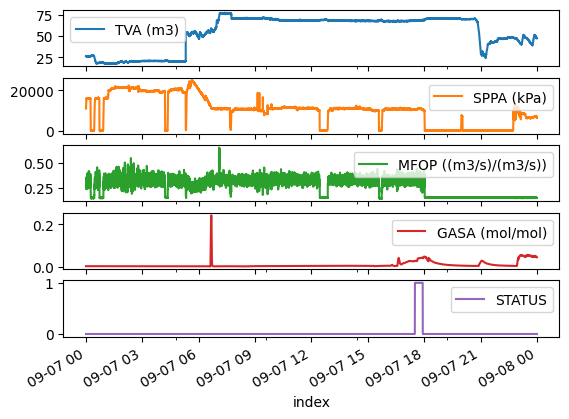

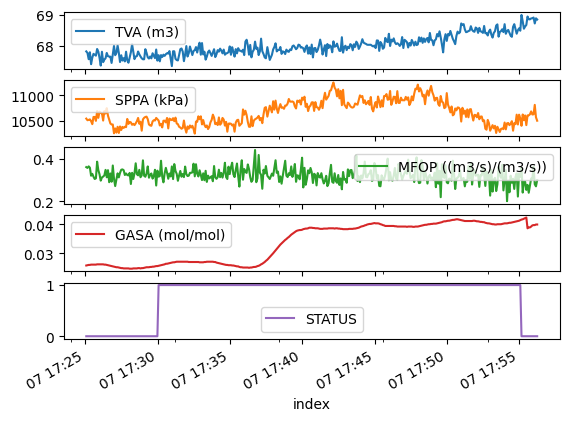

In [37]:
plot_cols = ['TVA (m3)', 'SPPA (kPa)', 'MFOP ((m3/s)/(m3/s))', 'GASA (mol/mol)','STATUS']
plot_features = X[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

plot_features = X[plot_cols][12527:12900]
plot_features.index = date_time[12527:12900]
_ = plot_features.plot(subplots=True)



In [221]:
X.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
TVA (m3),17280.0,47.624560,12.430833,35.9,39.200000,42.900000,46.800000,74.800000
SPPA (kPa),17280.0,2109.196430,3512.616661,0.0,20.684272,206.842719,2061.532431,12631.195361
MFOP ((m3/s)/(m3/s)),17280.0,0.047603,0.042326,0.0,0.010000,0.050000,0.050000,0.500000
GASA (mol/mol),17280.0,0.003137,0.009380,0.0,0.000000,0.000000,0.004300,0.330500
STATUS,17280.0,0.006308,0.079174,0.0,0.000000,0.000000,0.000000,1.000000


In [ ]:
timestamp_s = date_time.map(pd.Timestamp.timestamp)


In [260]:
df=df[['TVA (m3)', 'SPPA (kPa)',
       'MFOP ((m3/s)/(m3/s))', 'GASA (mol/mol)', 'STATUS']]

In [280]:
column_indices = {name: i for i, name in enumerate(['TVA (m3)', 'SPPA (kPa)',
       'MFOP ((m3/s)/(m3/s))', 'GASA (mol/mol)', 'STATUS'])}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]


In [278]:
train_mean = train_df.mean()
train_std = train_df.std()
print(train_std,train_mean)
train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std


TVA (m3)                  2.887226
SPPA (kPa)              995.397613
MFOP ((m3/s)/(m3/s))      0.026902
GASA (mol/mol)            0.004389
STATUS                    0.000000
dtype: float64 TVA (m3)                 41.153919
SPPA (kPa)              532.268309
MFOP ((m3/s)/(m3/s))      0.044768
GASA (mol/mol)            0.000211
STATUS                    0.000000
dtype: float64


In [283]:
val_df

,TVA (m3),SPPA (kPa),MFOP ((m3/s)/(m3/s)),GASA (mol/mol),STATUS
12096,45.1,7563.548751,0.02,0.0119,0
12097,45.1,7673.864867,0.03,0.0120,0
12098,45.0,7756.601955,0.04,0.0119,0
12099,44.9,7804.865256,0.05,0.0119,0
12100,44.9,7846.233800,0.04,0.0118,0
...,...,...,...,...,...
15547,73.3,5543.384864,0.00,0.0045,0
15548,73.3,5550.279621,0.00,0.0046,0
15549,73.3,5515.805835,0.00,0.0045,0
15550,73.2,5536.490106,0.00,0.0044,0


In [289]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])


In [234]:
w1 = WindowGenerator(input_width=36, label_width=1, shift=36,
                     label_columns=['STATUS'])
w1

Total window size: 72
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35]
Label indices: [71]
Label column name(s): ['STATUS']

In [235]:
w2 = WindowGenerator(input_width=36, label_width=1, shift=1,
                     label_columns=['STATUS'])
w2


Total window size: 37
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35]
Label indices: [36]
Label column name(s): ['STATUS']

In [290]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [291]:
import tensorflow as tf

In [292]:
example_window = tf.stack([np.array(train_df[:w2.total_window_size]),
                           np.array(train_df[100:100+w2.total_window_size]),
                           np.array(train_df[200:200+w2.total_window_size])])

example_inputs, example_labels = w2.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')


All shapes are: (batch, time, features)
Window shape: (3, 37, 5)
Inputs shape: (3, 36, 5)
Labels shape: (3, 1, 1)


In [293]:
def plot(self, model=None, plot_col='STATUS', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [min]')

WindowGenerator.plot = plot


In [294]:
example_window = tf.stack([np.array(train_df[:w2.total_window_size]),
                           np.array(train_df[100:100+w2.total_window_size]),
                           np.array(train_df[200:200+w2.total_window_size])])

example_inputs, example_labels = w2.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')


All shapes are: (batch, time, features)
Window shape: (3, 37, 5)
Inputs shape: (3, 36, 5)
Labels shape: (3, 1, 1)


In [295]:
w2.example = example_inputs, example_labels

AttributeError: property of 'WindowGenerator' object has no setter

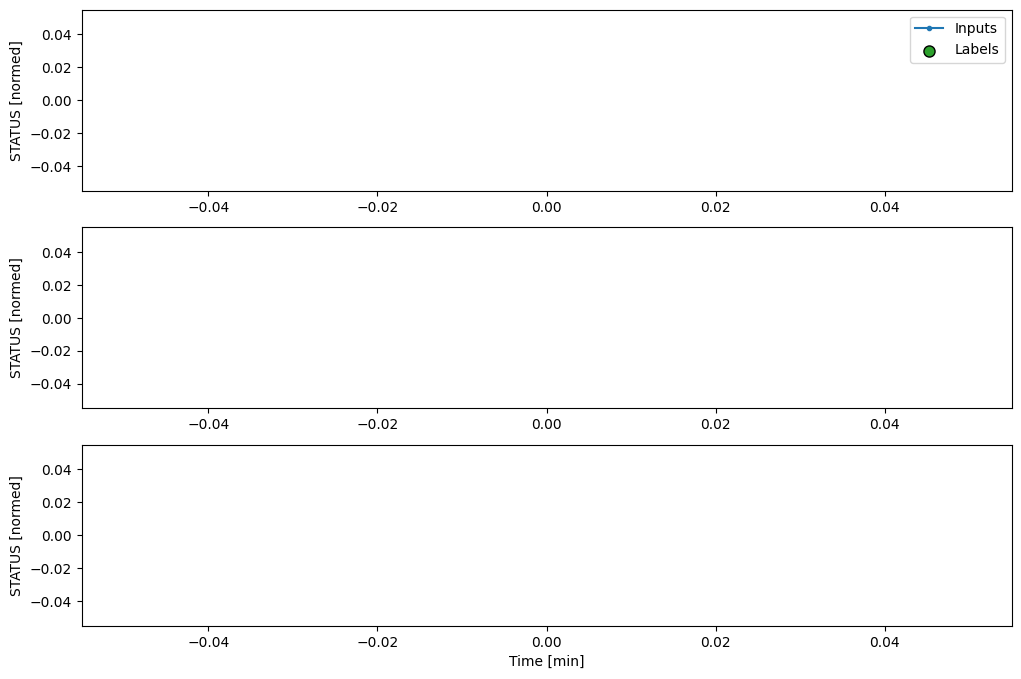

In [296]:
w2.plot()


In [ ]:
df.columns

Index(['TVA (m3)', 'SPPA (kPa)', 'MFOP ((m3/s)/(m3/s))', 'GASA (mol/mol)',
       'STATUS'],
      dtype='object')

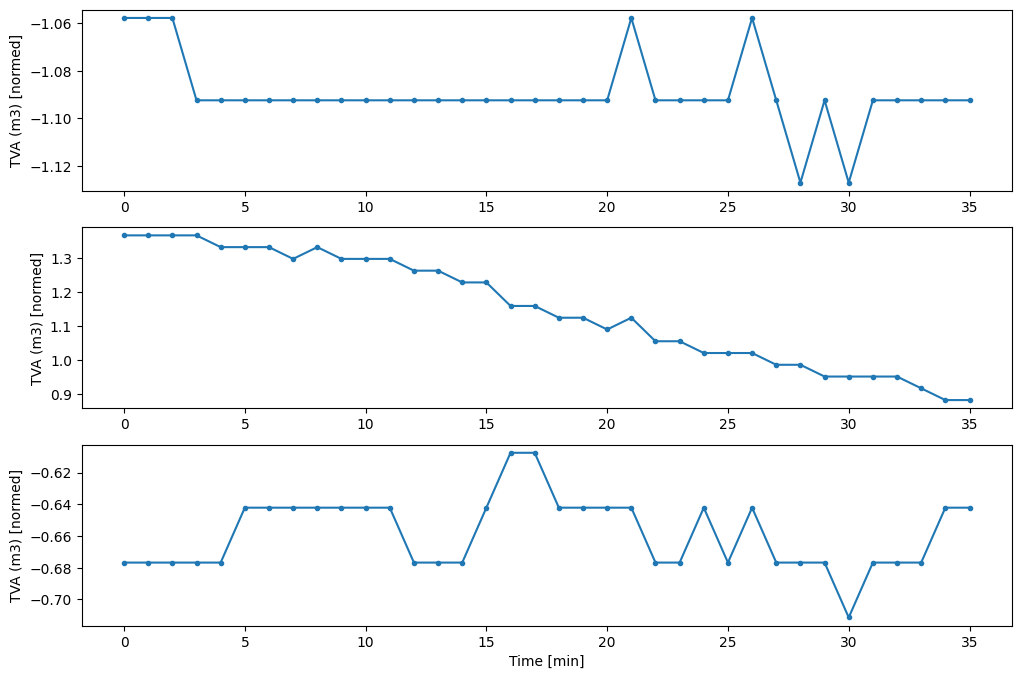

In [297]:
w2.plot(plot_col='TVA (m3)')


In [298]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [299]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example


In [300]:
# Each element is an (inputs, label) pair.
w2.train.element_spec


(TensorSpec(shape=(None, 36, 5), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))

In [301]:
for example_inputs, example_labels in w2.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')


Inputs shape (batch, time, features): (32, 36, 5)
Labels shape (batch, time, features): (32, 1, 1)


In [302]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['STATUS'])
single_step_window


Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['STATUS']

In [ ]:
for example_inputs, example_labels in single_step_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')


Inputs shape (batch, time, features): (32, 1, 5)
Labels shape (batch, time, features): (32, 1, 1)


In [304]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['STATUS'])
single_step_window


Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['STATUS']

In [305]:
for example_inputs, example_labels in single_step_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')


Inputs shape (batch, time, features): (32, 1, 5)
Labels shape (batch, time, features): (32, 1, 1)


In [313]:
wide_window = WindowGenerator(
    input_width=36, label_width=36, shift=1,
    label_columns=['STATUS'])

wide_window


Total window size: 37
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36]
Label column name(s): ['STATUS']

In [328]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(64, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])


In [329]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', lstm_model(wide_window.example[0]).shape)


Input shape: (32, 36, 5)
Output shape: (32, 36, 1)


In [330]:
wide_window

Total window size: 37
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36]
Label column name(s): ['STATUS']

In [337]:
MAX_EPOCHS = 10

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

In [338]:
history = compile_and_fit(lstm_model, wide_window)




Epoch 1/10
377/377 [==============================] - 32s 62ms/step - loss: 0.0358 - mean_absolute_error: 0.0567 - val_loss: 0.0323 - val_mean_absolute_error: 0.0408
Epoch 2/10
377/377 [==============================] - 23s 61ms/step - loss: 1.4811e-04 - mean_absolute_error: 0.0053 - val_loss: 0.0325 - val_mean_absolute_error: 0.0401
Epoch 3/10
377/377 [==============================] - 21s 57ms/step - loss: 9.6009e-05 - mean_absolute_error: 0.0043 - val_loss: 0.0323 - val_mean_absolute_error: 0.0387


In [339]:
lstm_model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 36, 64)            17920     
                                                                 
 dense_11 (Dense)            (None, 36, 1)             65        
                                                                 
Total params: 17,985
Trainable params: 17,985
Non-trainable params: 0
_________________________________________________________________


In [345]:
val_performance = {}
performance = {}


In [348]:
performance

{'LSTM': [2.6162249923800118e-05, 0.0022014782298356295]}

In [346]:
val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0)

107/107 [==============================] - 2s 20ms/step - loss: 0.0323 - mean_absolute_error: 0.0387


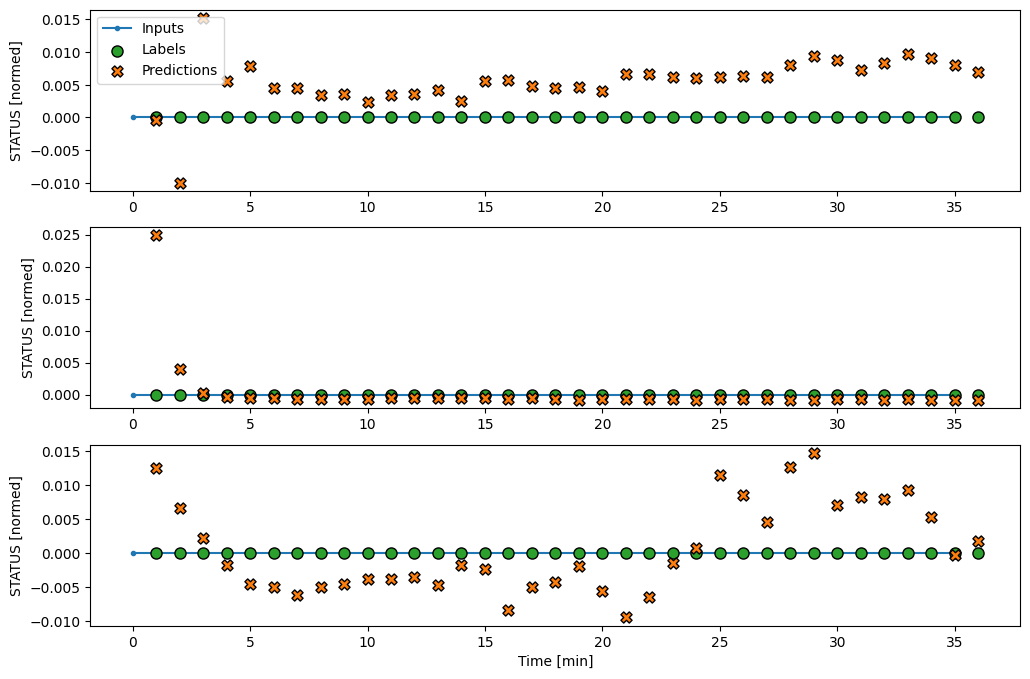

In [344]:
wide_window.plot(lstm_model)
